In [2]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
df=pd.read_csv(r"C:\Users\saila\OneDrive\Desktop\MLPROJECT\Regularized Regression Forest Fire Prediction\fire_archive_M6_96619.csv")

In [5]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [7]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [8]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [13]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')
Index(['acq_date', 'satellite', 'instrument', 'daynight'], dtype='object')


In [14]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day
df.drop('acq_date', axis=1, inplace=True)


In [15]:
categorical_cols = ['satellite', 'instrument', 'daynight']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [16]:
df

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type,year,month,day,satellite_Terra,daynight_N
0,-11.8070,142.0583,313.0,1.0,1.0,56,48,6.3,297.3,6.6,0,2019,8,1,True,False
1,-11.7924,142.0850,319.3,1.0,1.0,56,71,6.3,297.3,11.3,0,2019,8,1,True,False
2,-12.8398,132.8744,311.6,3.1,1.7,57,42,6.3,298.7,23.1,0,2019,8,1,True,False
3,-14.4306,143.3035,310.1,1.1,1.1,57,33,6.3,296.1,6.5,0,2019,8,1,True,False
4,-12.4953,131.4897,310.3,4.0,1.9,57,36,6.3,298.8,27.6,0,2019,8,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,1644,85,6.3,292.9,14.2,0,2019,9,30,False,True
36007,-28.2625,128.5494,304.9,1.0,1.0,1644,27,6.3,290.9,6.4,0,2019,9,30,False,True
36008,-28.2941,128.5123,301.7,1.0,1.0,1644,43,6.3,290.4,5.5,0,2019,9,30,False,True
36009,-28.3001,128.5530,303.6,1.0,1.0,1644,41,6.3,290.3,5.7,0,2019,9,30,False,True


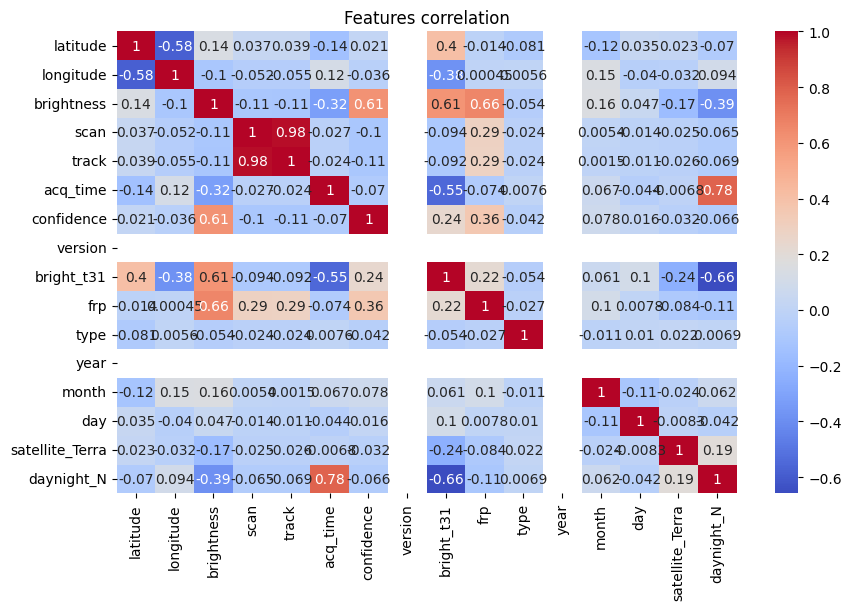

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Features correlation")
plt.show()

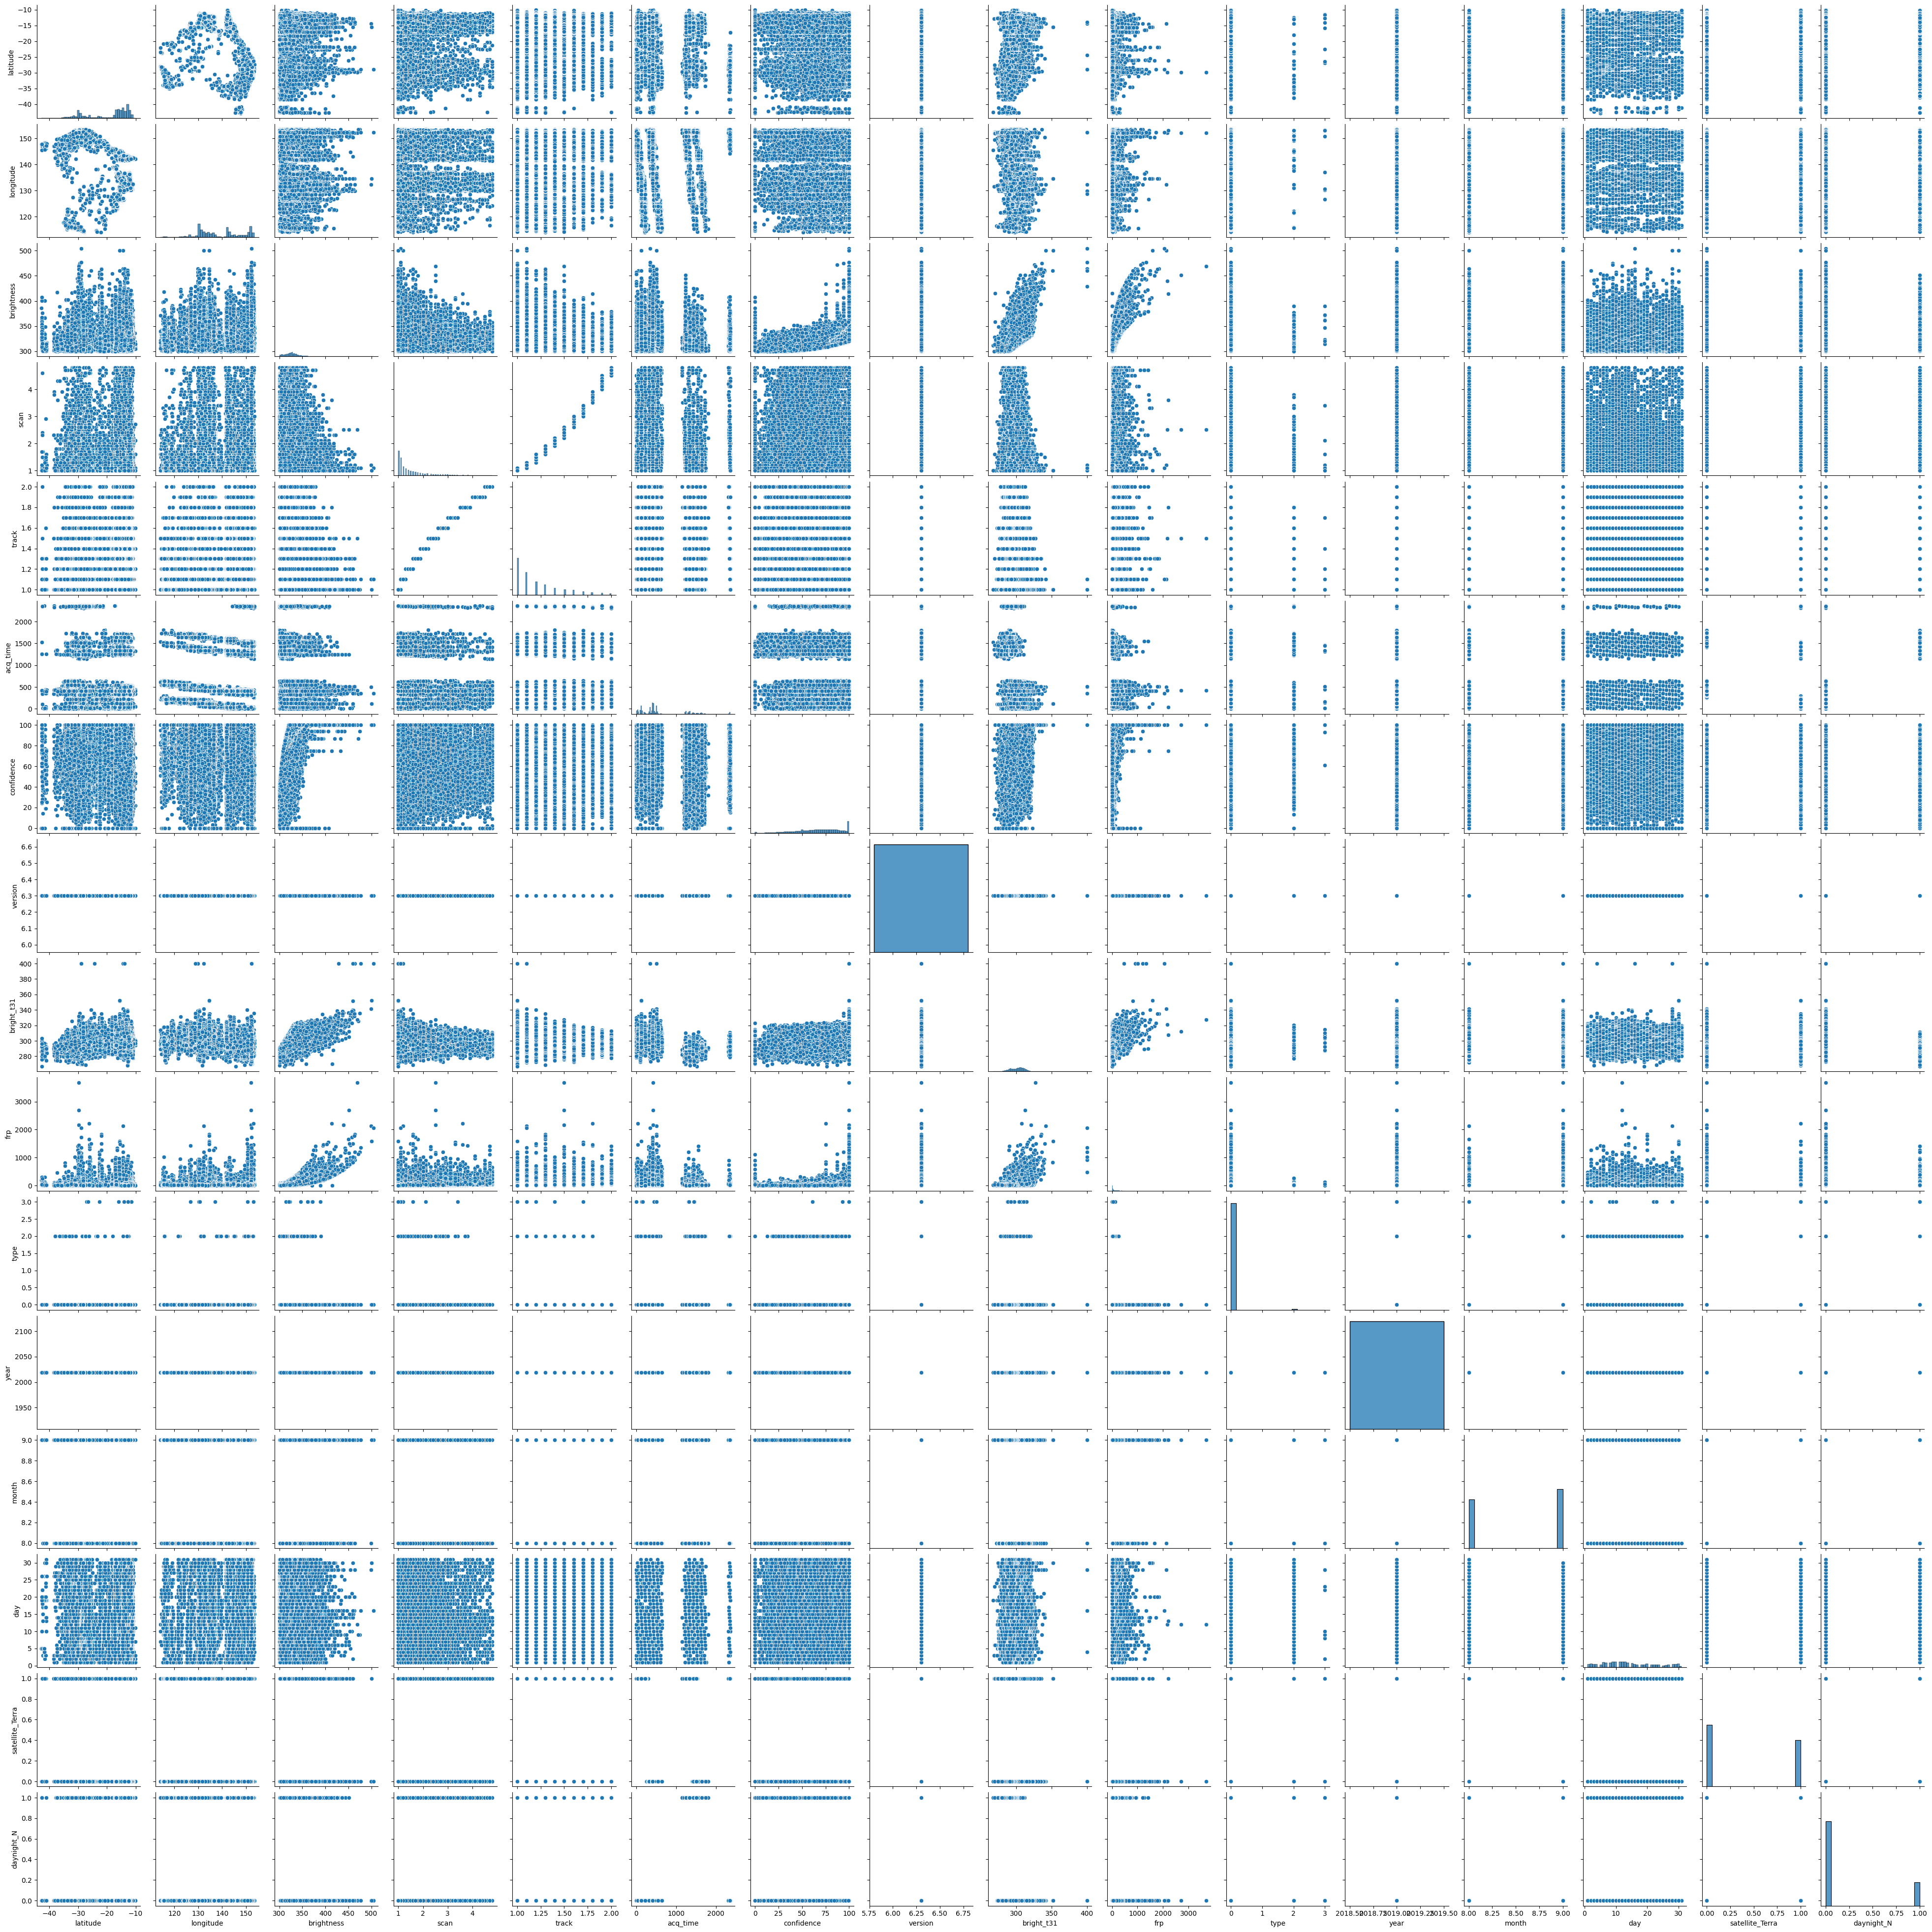

In [18]:
# Pairplot for relationships
sns.pairplot(df)
plt.show()

In [19]:
df.dropna()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type,year,month,day,satellite_Terra,daynight_N
0,-11.8070,142.0583,313.0,1.0,1.0,56,48,6.3,297.3,6.6,0,2019,8,1,True,False
1,-11.7924,142.0850,319.3,1.0,1.0,56,71,6.3,297.3,11.3,0,2019,8,1,True,False
2,-12.8398,132.8744,311.6,3.1,1.7,57,42,6.3,298.7,23.1,0,2019,8,1,True,False
3,-14.4306,143.3035,310.1,1.1,1.1,57,33,6.3,296.1,6.5,0,2019,8,1,True,False
4,-12.4953,131.4897,310.3,4.0,1.9,57,36,6.3,298.8,27.6,0,2019,8,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,1644,85,6.3,292.9,14.2,0,2019,9,30,False,True
36007,-28.2625,128.5494,304.9,1.0,1.0,1644,27,6.3,290.9,6.4,0,2019,9,30,False,True
36008,-28.2941,128.5123,301.7,1.0,1.0,1644,43,6.3,290.4,5.5,0,2019,9,30,False,True
36009,-28.3001,128.5530,303.6,1.0,1.0,1644,41,6.3,290.3,5.7,0,2019,9,30,False,True


In [20]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [25]:
numeric_cols = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
                'confidence', 'version', 'bright_t31', 'frp', 'type']

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)


In [26]:
# Example target: brightness (change if needed)
X = df.drop('brightness', axis=1)
y = df['brightness']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [30]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("-"*40)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross-validated R²: {cv_scores.mean():.4f}")
    
    return model

In [31]:
# ------------------------
ridge = Ridge(alpha=1.0)
ridge_model = evaluate_model(ridge, X_train, y_train, X_test, y_test)

# ------------------------
# 8. Lasso Regression
# ------------------------
lasso = Lasso(alpha=0.01)
lasso_model = evaluate_model(lasso, X_train, y_train, X_test, y_test)

# ------------------------
# 9. ElasticNet Regression
# ------------------------
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_model = evaluate_model(elasticnet, X_train, y_train, X_test, y_test)

Model: Ridge
R² Score: 0.9299
MAE: 2.5442
MSE: 10.8514
RMSE: 3.2941
----------------------------------------
Cross-validated R²: 0.9305
Model: Lasso
R² Score: 0.9299
MAE: 2.5447
MSE: 10.8534
RMSE: 3.2944
----------------------------------------
Cross-validated R²: 0.9305
Model: ElasticNet
R² Score: 0.9298
MAE: 2.5471
MSE: 10.8622
RMSE: 3.2958
----------------------------------------
Cross-validated R²: 0.9304


In [35]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge example
lasso = Lasso()
params = {'alpha':[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lasso, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'alpha': 0.01}


In [36]:
# ------------------------
lasso_coef = pd.Series(lasso_model.coef_, index=X.columns)
important_features = lasso_coef[lasso_coef != 0].sort_values(ascending=False)
print("Important features according to Lasso:\n", important_features)# ------------------------


Important features according to Lasso:
 frp                8.014110
bright_t31         4.655067
latitude           1.031507
confidence         0.763536
month              0.640286
longitude          0.220259
day                0.068346
acq_time          -0.285198
satellite_Terra   -0.299611
track             -1.239519
daynight_N        -1.845237
scan              -3.226521
dtype: float64


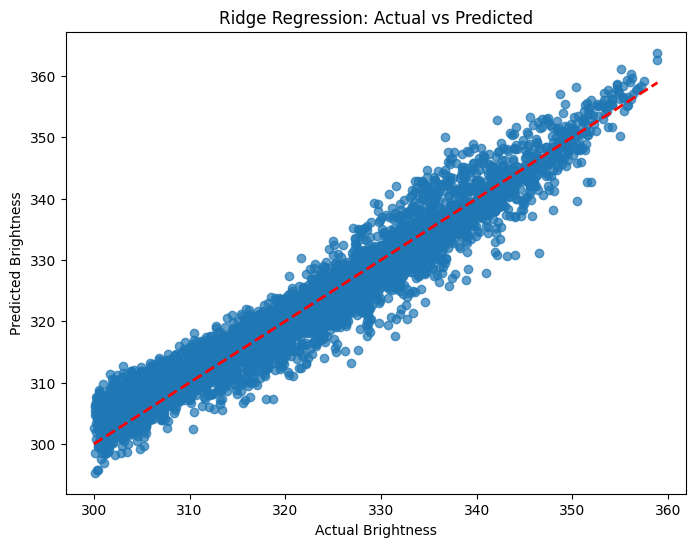

In [33]:
y_pred = ridge_model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Brightness')
plt.ylabel('Predicted Brightness')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()